<a href="https://colab.research.google.com/github/AdityaMitra5102/Mariana-Colab/blob/main/Mariana_web_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

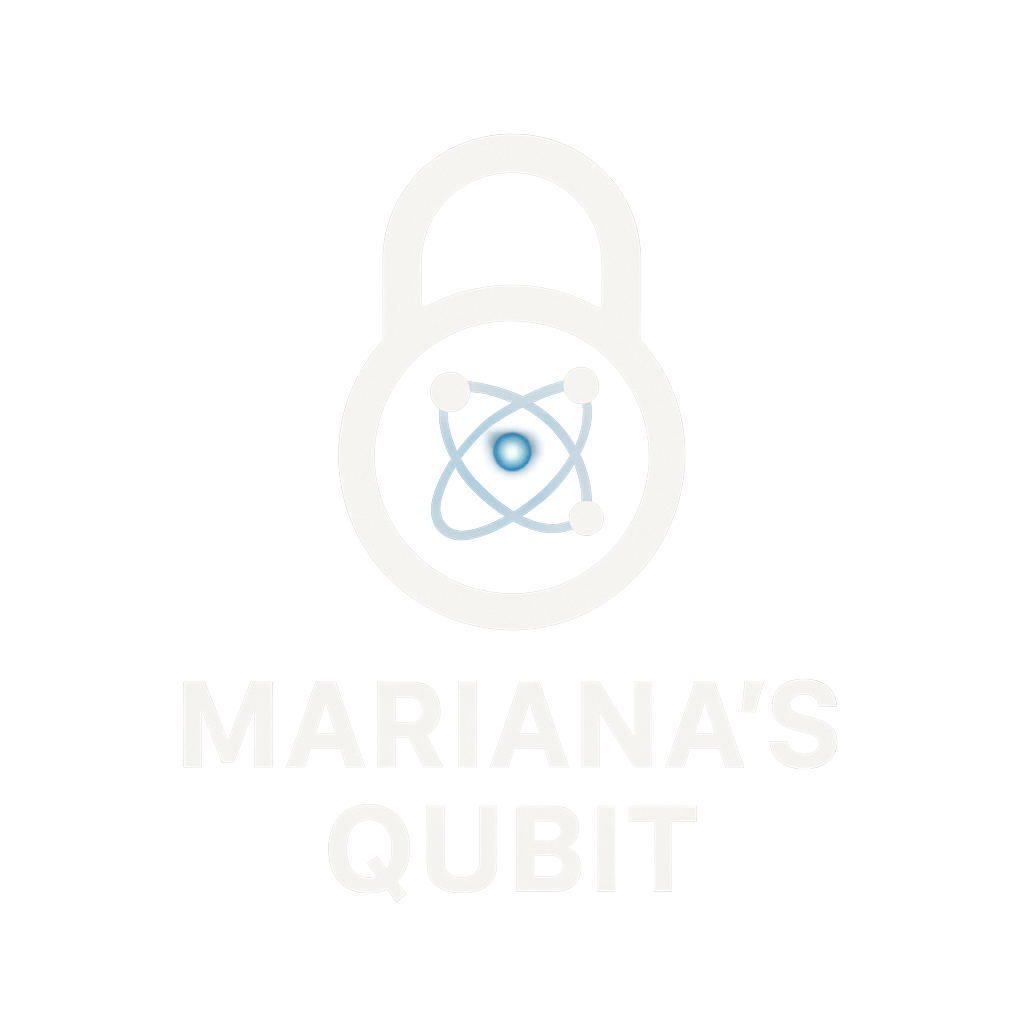

# Mariana's Web Hosting test

## This just hosts a demo website on Mariana for testing the routing and network


In [ ]:

nodename='Mariana Web Test'

!sudo apt install -y apache2


!sudo a2enmod ssl
!sudo a2enmod proxy
!sudo a2enmod proxy_http
!sudo a2enmod headers
!sudo a2enmod substitute
!sudo service apache2 status
!sudo service apache2 restart


!sudo apt-get install python3.12 python3-pip python3.12-dev build-essential libffi-dev libssl-dev git -y
!curl https://bootstrap.pypa.io/get-pip.py | python3.12
!git clone https://github.com/AdityaMitra5102/Project-Mariana.git
!sudo apt remove python3-blinker
!python3.12 -m pip install -r Project-Mariana/requirements.txt --force-reinstall

marsec='''{
    "web_server_allow": true,
    "clearnet_exit_proxy": true,
    "port_fw_allow": [],
    "cargo_ship_allow_exec": true,
    "allow_mismatch_contact": false,
    "allow_unknown_nac": true,
    "verify_neighbors": false,
    "desc": "{{nodename}}"
}'''
marsec=marsec.replace('{{nodename}}', nodename)
import os
x=os.path.join(os.path.expanduser('~/.config'), 'Mariana')
os.makedirs(x, exist_ok=True)
with open(os.path.join(x,'security.json'), 'w') as f:
  f.write(marsec)
from IPython import display
display.clear_output()

import subprocess
process2=subprocess.Popen('python3.12 Project-Mariana/proxyserver.py'.split())
import time
import requests
while True:
  try:
    resp=requests.get('http://localhost:8000/active')
    txt=resp.text
    if 'true' in txt:
      print('Connected to Mariana network')
      break
    print('Waiting to connect to Mariana network')
  except:
    print('Waiting for Mariana to start')
  time.sleep(0.5)

privkey=None
with open(os.path.join(x, 'privatekey.pem'), 'rb') as f:
  privkey=f.read()

import sys
sys.path.append('./Project-Mariana')

from utils import *
from crypto import *

pubkey=get_pub_key(privkey)
id=make_id_string(pubkey)
print()
print('Node id: '+id)
print('Node description: '+nodename)